___
# Linear Regression

Example of running it
___

## Import Libraries

In [156]:
## remove this, this is for my personal pc setup
import sys; import os; sys.path.append(os.path.expanduser('~/DropBox/my/projects/T/'))

In [157]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas   as pd
import operator as op

import numpy             as np
import seaborn           as sns
from datetime import datetime

import pyscope
from pyscope import read_ss

from IPython.display import IFrame

from T import * # want T to be accessible

%load_ext autoreload
%autoreload

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.seterr(divide='ignore', invalid='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## Data

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the variance score are also
calculated.


In [158]:
from sklearn import datasets

In [159]:

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

data1 = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])

# lets select BMI
data1 = T(data1).select("target", "bmi", "age")
data1.head()

,target,bmi,age
0,151.0,0.061696,0.038076
1,75.0,-0.051474,-0.001882
2,141.0,0.044451,0.085299
3,206.0,-0.011595,-0.089063
4,135.0,-0.036385,0.005383


## EDA

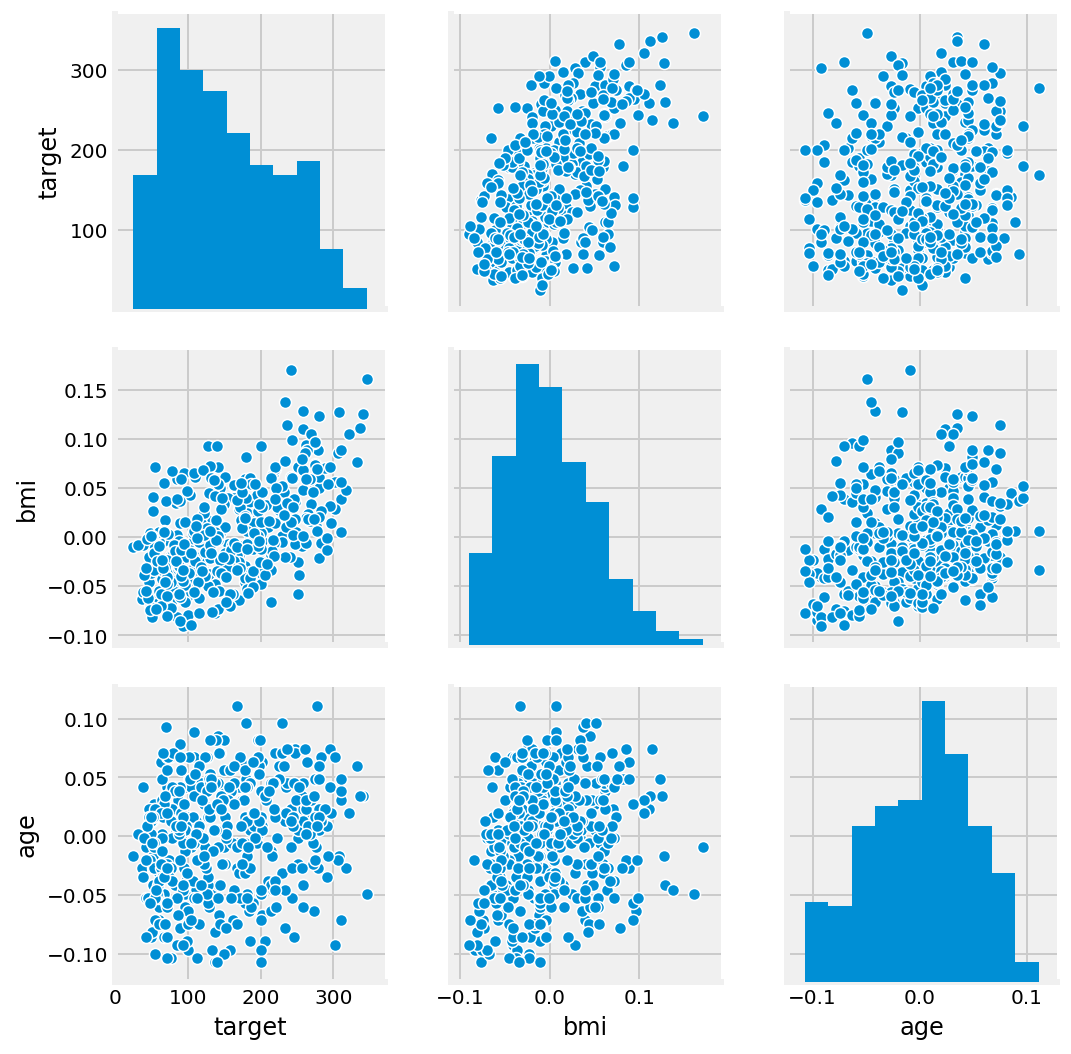

In [160]:
sns.pairplot(data1)

See that the bmi is more correlated with the target value, than the age is

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [161]:
X = data1[['bmi', "age"]]
y = data1['target']

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
lm = LinearRegression()

In [166]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [167]:
# print the intercept
print(lm.intercept_)

153.76513307440416


In [168]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bmi,930.890304
age,97.757629


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **bmi** is associated with an **increase of 930 **.
- Holding all other features fixed, a 1 unit increase in **age** is associated with an **increase of 97.8**.


## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

It plot real vs prediction, so the more the chart  looks like a straight line, the more accurate the model is doing.

In [169]:
predictions = lm.predict(X_test)

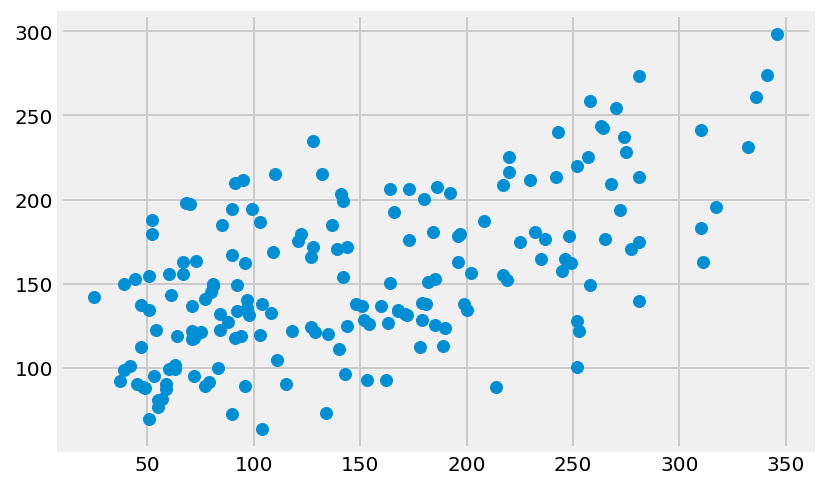

In [170]:
plt.scatter(y_test,predictions)

**Residual Histogram**

When the distribution of the residuals is normal means the model was a correct choice for data.
If not then Linear regression model might not be the best model to use here.

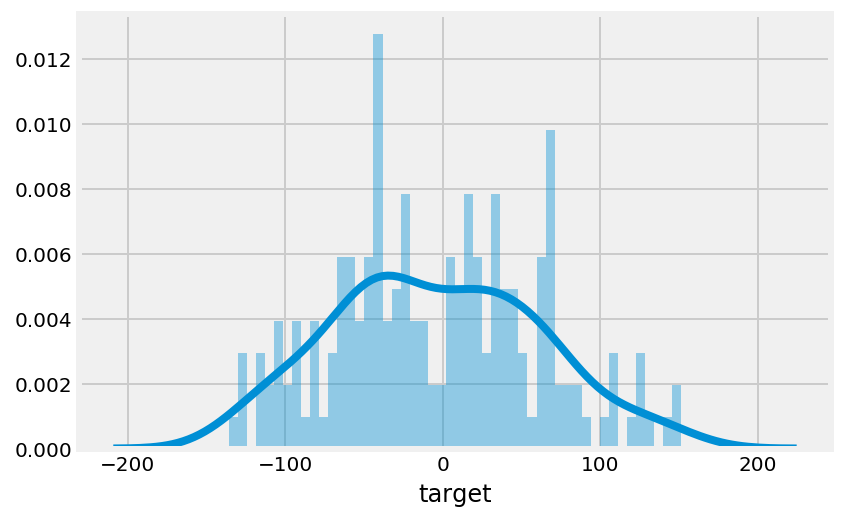

In [171]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [172]:
from sklearn import metrics

In [173]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 54.161074472636294
MSE: 4204.097440890376
RMSE: 64.83901172049413


These represent the predicted vs the true values error